# Neural Network Fundamentals. Part 1: NN from scratch.

## Imagine the following problem.
There are handwritten numbers that you want computer to correctly classify. It would be an easy task for a person but an extremely complicated one for a machine, especially, if you want to use some traditional prediction model, like linear regression. Even though the computer is faster than the human brain in numeric computations, the brain far outperforms the computer in some tasks.

<img src="pics/problem.png" alt="Drawing" style="width: 600px;"/>

## Some intuition from the Nature

People struggled to teach machines to solve this kind of problems for a long time without success.
Unless they noticed a very peculiar thing. Nature creatures, even the simple ones, for instance 
insects, can perform complicated task with very limited brain capacities, which are far below 
those of the computers. So there is something nature has developed that allows to solve tasks 
apparently complicated for machines tasks in a smart way.
One of the ides that came to mind is to replicate the structure and certain functions of nature beings 
brain and neurosystem that allow for cognitive process and beyond.
A particular example of such structures is neuron system.

<img src="pics/neurons.png" alt="Drawing" style="width: 600px;"/> [Source: https://www.jstor.org/stable/pdf/2684922.pdf]

<img src="pics/neurons_net3.png" alt="Drawing" style="width: 500px;"/> [Source: https://pixabay.com/]

A particular detail about how are our cognitive and perceptive processes organised is a complicated 
structure of simple elements which create a complex net where each element is connected with others 
receiving and transmitting information. An idea to implement such a structure in order to make 
predictions gave birth to what we now now as neural network models.

### Early development:
##### 1943
McCulloch-Pitts model of the neuron. The neuron receives a weighted sum of inputs from connected units, and output a value of one (fires) if this sum is greater than a thresh- old. If the sum is less than the threshold, the model neuron output a zero value.

##### Early 1960s
Rosenblatt developed a model called simple perceptron. The simple perceptron consists of McCulloch- Pitts model neurons that form two layers, input and output. His model was able to find a solution to classification problems if the problem was linearly separable.
Later on Minsky and Papert addressed the linear severability limitation of Rosenblatt model. He knew it himself but could not figure it out.
This hindered the process of NNs development.

##### 1982
Hopfield Model used mainly for optimization problems like travel sales man problem
Later on, the idea of backpropagation was introduced and it addressed the earlier problems of the simple perceptron and renewed interest in neural networks. Backpropagation training algorithm is capable of solving nonlinear separable problems.

### Different Applications
At the current stage NNs are capable to model many of the capabilities of the human brain and beyond.
On a practical level the human brain has many features that are desirable in an electronic computer. The human brain has the ability to generalize from abstract ideas, recognize patterns in the presence of noise, quickly recall memories, and withstand localized damage.

Usages of NNS:
- identifying underwater sonar contacts
- predicting heart problems in patients
- diagnosing hypertension
- recognizing speech
- the preferred tool in predicting protein secondary structures

Statisticians use these models to address the same problems:
- discriminant analysis
- logistic regression
- Bayes and other types of classifiers
- multiple regression
- time series models such as ARIMA and other forecasting methods

## Schematic Representation

All the above mentioned applications of neural networks have in common a structure that in a simplified way can be depicted using the following picture (see Picture 1).

<img src="pics/neural_network1.png" alt="Drawing" style="width: 700px;"/>

# Implementation of the NN from scratch

Within the following sections we will implement such a structure from scratch and use it to solve the classification problem stated in the beginning of the blogpost. All we need in order to do this is Python with a limited number of basic packages. For the sake of making this tutorial even more accessible and also more interactive all the code provided below will be implemented in Jupyter notebook.

First let's determine the elements we can see on the Picture 1 and need to collect in order to implement a NN. These elements are:
* nodes;
* layers;
* weights between nodes in neighboring levels;
* activation functions.

### Nodes - ...

### Layers - ...

In our case we have a structure with 3 layers: input, output and one hidden layer. The number of nodes in the input  ("i_n"), hidden ("h_n") and output ("o_n") layers are 3, 5 and 2 respectively. Using Python code such a structure can be represented in the following way:

In [65]:
# Load the package to work with numbers
import numpy as np

In [66]:
# Determine the structure of the NN
i_n = 3
h_n = 5
o_n = 2

### Weights - ...

Initially we assign weights between nodes in neighboring layers randomly. This is needed only for the sake of initializing the structure. Later these weights will be changed in order to solve our classification problem. Weights' updating procedure will be described in the following sections.

The output should be n-1 matrices (where n corresponds to the number of layers in the NN). Each of these matrices will be of a size f by p (where p is the number of nodes in the corresponding preceding layer and f is the number of nodes in the corresponding following layer).

This becomes more clear once you check the code below that creates 2 matrices of weights:
* matrix of weights between input and hidden layers ("w_i_h") - 5 by 3 matrix
* matrix of weights between hidden and output layers ("w_h_o") - 2 by 5 matrix.

Such a dimensions of matrices are necessary in order to accomplish matrix and vector multiplications that will be described later.

In [67]:
# Randomly define the weights between the layers. 
# Dimensions of these matrices are determined by the sizes of the layers they are connecting.
w_i_h = np.random.rand(h_n, i_n) # create an array of the given shape and populate it with random values.
w_h_o = np.random.rand(o_n, h_n) 

# Show matrices of randomly assigned weights.
w_i_h
# w_h_o # uncomment this line in order to see the values for w_h_o.
# Use Cmd + / in MacOS and CTRL + / in MS Windows as a shortcut to comment/uncomment lines.

array([[ 0.74997179,  0.11739406,  0.28602623],
       [ 0.09281727,  0.09172762,  0.74431992],
       [ 0.42063356,  0.91765743,  0.91437373],
       [ 0.99580619,  0.85346535,  0.70223563],
       [ 0.68776875,  0.51399374,  0.01569343]])

### Activation Function

One other concept that initially was to certain extent inspired by the way neurosystems in the nature work is the concept of "firing". Neurons has a particular characteristic - they are activated, i.e. send signal further or "fire" only when they get a signal that is strong enough - stronger than certain threshold. Such a feature of the neurons in the setting of a NN is called activation function. In the easiest case it can be represented by a step function as one on the Picture below.

<img src="pics/step_function.png" alt="Drawing" style="width: 700px";/> [Source: https://www.researchgate.net/figure/Three-different-types-of-transfer-function-step-sigmoid-and-linear-in-unipolar-and_306323136]

#### activation functions ...

In [68]:
# Determine activation function which is an approximation for "firing" of neurons.
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # np.exp() calculates the exponential of all elements in the input array.

Draw this function using `matplotlib.pyplot` package.

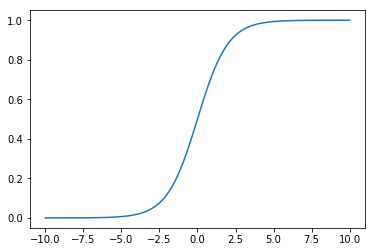

In [69]:
# Draw the function.
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100) # return 100 evenly spaced numbers over an interval from -10 to 10.
plt.plot(x, sigmoid(x)) # plot sigmoid function for sampled values.
plt.show() # show the plot.

## Inspect the Data

By now we have collected all the elements of the NN. Can we use this structure in order to solve the classification problem stated in the beginning of the blogpost?

In order to answer this question we need first to get a better understanding of the data in disposition. 

We are trying to check whether NN is able to solve the classification problem using a collection of 70 000 handwritten numbers. Each of this handwritten number is represented as 28x28 image. 

The original source of the data is "THE MNIST DATABASE". A detailed description of the dataset as well as the dataset itself can be found under the following link:
http://yann.lecun.com/exdb/mnist/. There you can also find a summary of the performance results achieved by various classification algorithms which used this dataset.

For the sake of simplicity we suggest obtaining the data from another source:
https://pjreddie.com/projects/mnist-in-csv/. Here the original images are transformed in csv.format, which allows to work with them directly.

For the purposes of demonstration below we use a smaller dataset (100 images), which will be expanded at later stage.

In [70]:
# Load the data.
raw_data = open("data/mnist_train_100.csv", 'r') # "r" stands for "read only" mode.
data = raw_data.readlines() # read all the lines of a file in a list.
raw_data.close() # remove temporal file from the environment in order to save memory.

In [71]:
# Inspect the data - check the number of observations.
len(data) # length of the object.

100

In [72]:
# Inspect a particular observation of the data.
data[0] # show observation number 0 from the list (remember that in Python numbering starts from 0).

'3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,254,254,254,254,255,209,126,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,119,230,233,241,216,248,254,254,239,223,132,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,25,38,0,48,126,245,244,251,254,243,198,131,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,113,192,254,254,235,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,29,226,254,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,107,254,249,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,186,254,254,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,96,216,254,228,100,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,89,212,254,254,210,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,213,255,254,247,66,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,254,21

A particular observation looks like a string of 785 elements (label of the image + 784 elements for each pixels of a 28x28 image). 

Each element representing a pixel is a number from 0 to 255 (from white to black color).

The first element in the line is the label of the image and therefore is a number from 0 to 9.

Using `matplotlib.pyplot` package we can also reconstruct the original image based on the data about each pixel in the string.

In [73]:
# Load the package to plot the data
import matplotlib.pyplot as mpp
%matplotlib inline

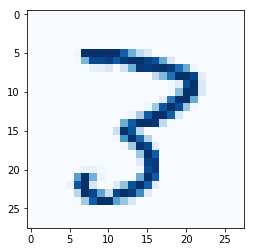

In [74]:
# Plot the data
observation = data[0].split(',') # break down observation number 0 (comma is used to identify each element).
image = np.asfarray(observation[1:]).reshape((28,28)) # take all the elements starting from the element 1 
# (exclude element number 0, that corresponds to the label) and reshape them as an array with dimension 28 by 28.
mpp.imshow(image, cmap='Blues', interpolation='None') # show the plot of this array using grey pallete.

In [75]:
# Save an observation of the data as an input to work with.
input = np.array(np.asfarray(observation[1:]), ndmin=2).T # save necessary elements in a vertical vector shape.

In [95]:
# Show the input vector.
input

array([[ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0.01      ],
       [ 0

## Fit the draft of the NN's structure to the Data

Let's take a look once again at the NN's structure we have created at the beginning of the tutorial.

<img src="pics/neural_network1.png" alt="Drawing" style="width: 700px;"/>

After the inspection of the data we can conclude that the structure with 3-5-2 nodes is probably not optimal and therefore should be updated in order to fit the data we have and peculiarities of the classification problem. 

So, for each observation we have 784 elements as an input (label element is excluded). Accordingly, instead of 3 input nodes we should better have 784. 

Similarly, as we have 10 different options for the outcome (handwritten numbers are labeled from from 0 to 9) the number of output nodes should be 10 instead of 2. 

We also change the number of hidden nodes from 5 to 90. Such a number has been assigned based on some proportionality assumptions which will be checked later: 90 is 9 times higher than 10 and approximately 9 times smaller than 784.

In [77]:
# Determine the new structure of the NN.
i_n = 784
h_n = 90
o_n = 10

As we have new structure of the NN we should reassign the weights - now the size of each weight matrix will increase as we have more nodes in each layer.

In [78]:
# Determine the weights.
w_i_h = np.random.rand(h_n, i_n)
w_h_o = np.random.rand(o_n, h_n)

So far we have not used the first element of our observation - the label. It will be necessary to compare the predictions of the NN to the real state of the world and to train the NN to make correct predictions. The target should therefore have the same shape as the output layer of the NN, so that they could be comparable. We can represent the label as a vector of n elements (n corresponds to the number of nodes in the output layer), where each element is either 0 or 1. There should be only one element equal to 1 and the position of this element should correspond to the index number of the label we want to predict.

In [79]:
# Create target array.
target = np.array(np.zeros(o_n), ndmin=2).T
target[int(observation[0])] = 1 # int() method returns an integer object from any number or string.

In [80]:
# Inspect how the target looks like (remember that the label of observations is 5).
target

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [81]:
# Show the sizes of matrices of weights, input and target vectors.
w_i_h.shape, input.shape, w_h_o.shape, target.shape

((90, 784), (784, 1), (10, 90), (10, 1))

## Feed forward

Once we have the structure of the NN updated for the specific task of classifying the numbers depicted on the images, we can run our network in order to get the first predictions that will be represented by a vector of 10 elements. This vector in its turn can be compared to the target.

To run the NN, i.e. to feed forward our input data in order to get some predictions, we should follow certain steps:

1. Multiply an input vector by a matrix of weights that connects it with the next layer;
2. Transform the result using activation function;
3. Use the output obtained in the 2nd step as an input vector for the next layer.

A sequence of this steps should be repeated n-1 times (where n corresponds to the number of layers). The output of the previous layer will always be the input vector for the next layer. In our case the procedure will happen twice.

On the Picture bellow you can see the procedure necessary to obtain the output of the hidden layer.
The result of matrix multiplication here is called "Hidden_Input". Transformation of "Hidden_Input" through activation function is called "Hidden_Output".

This output will be used as the input vector that should be multiplied by the next weigh matrix and transformed through activation function in order to calculate the final output of the NN. If our NN would have more than 1 hidden layer, the procedure would be repeated more times.

<img src="pics/multiplication.png" alt="Drawing" style="width: 800px;"/>

<img src="pics/activation.png" alt="Drawing" style="width: 800px;"/>

Below you can see the code implementation of all the steps for all layers of the NN.

In [82]:
# Calculate the output of hidden and output layers of our NN.
h_input = np.dot(w_i_h, input) # dot() performs matrix multiplication; "h_input" stands for "Hidden_Input".
h_output = sigmoid(h_input) # "Hidden_Output" - result after activation function.
o_input = np.dot(w_h_o, h_output) # "Output_Input" - input used for the next layer.
o_output = sigmoid(o_input) # "Output_Output" - final output of the NN.

In [83]:
# Show intermediate data and output. 
# Uncomment the line of interest in order to see the the corresponding object.
# h_input
# h_output
# o_input
o_output

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

## Why don't we get what we expected? Data treatment best practices.

Once we check the output of the NN and the results of each performed step, we can observe that already at the stage of the h_output all the data converts to a vector of ones. A vector of equal values does not provide us with any inside that is helpful for the considered classification problem. Apparently, something is wrong with what we have done so far. There could be several reasons for the problem we face.

### First of all, let's take a look at our sigmoid function once again:

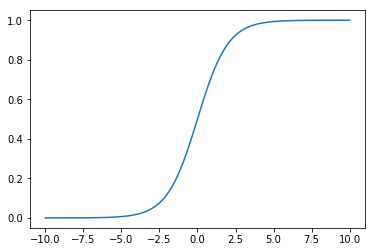

In [84]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.show()

As we can see the output of the sigmoid function will be almost identical once we feed a number bigger than 2. Similarly there is no significant difference between the outputs if numbers used are smaller than -2. Hence application of sigmoid function to the original data leads to a lose of valuable information - NN has problems to learn something from the inputs that are almost undifferentiable.  

One solution is to transform the input we have. Ideally we should have our data in a range between 0 and 1. It is desirable to avoid zeros, because the result of multiplication of an input equal to 0 by whichever weight will always be 0, hence NN will not be able to use this input to learn.

We can perform a transformation of the original data as the one coded below:

In [85]:
# Good practice transformation of the input values:
input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T 
# Our values in our input vector are in the range from 0 to 255. Therefore we should divide input vector by 255, 
# multiply it by 0,99 and add 0,01 in order to get values in the range from 0,01 to 1.

# Good practice transformation of the target value:
target = np.array(np.zeros(o_n) + 0.01, ndmin=2).T
target[int(observation[0])] = 0.99

### Secondly, we can check our way to randomly assign initial weights:

Let's take a look once at the function we used to randomly assign weights:

In [86]:
np.random.rand(3, 5)

array([[ 0.0929566 ,  0.80399214,  0.19298353,  0.09383669,  0.29774564],
       [ 0.2391368 ,  0.5695176 ,  0.47187771,  0.00741874,  0.05038327],
       [ 0.48572416,  0.13382937,  0.70382773,  0.41792049,  0.47215276]])

As we can see, all the weights are positive, while actual relationship between the features in the data and the values of the output vector can be negative. Hence, the way we employ to assign random weights should allow for negative weights too. 

Below there are too alternatives how this can be implemented in Python.


In [87]:
# Good practice for initial weights assignment:
    
alternative1 = np.random.rand(3, 5) - 0.5 
# or
alternative2 = np.random.normal(0.0, pow(3, -0.5), (3, 5)) 
# arguments: Mean of the distribution, Standard deviation of the distribution, Output shape.
# Second approach is better as it takes in account the standard deviation 
# that is related to the number of incoming links into a node, 1/√(number of incoming links).

# alternative1
alternative2

array([[-0.69263818,  1.01567791,  0.36971371, -0.86126302,  0.22298794],
       [-1.13684782, -0.12144631,  0.55360582, -0.50567714, -0.57922153],
       [-0.78691826,  0.14246747, -0.17866024, -0.32111769, -0.03961589]])

In [88]:
# Define the weights in accordance with the best practice:
w_i_h = np.random.normal(0.0, pow(h_n, -0.5), (h_n, i_n))
w_h_o = np.random.normal(0.0, pow(o_n, -0.5), (o_n, h_n))

Now, that we have all the elements assigned in accordance with the best practices, we can feedforward the data once again.

In [89]:
# Run NN to get new classification of the particular observation.
h_input = np.dot(w_i_h, input)
h_output = sigmoid(h_input)
o_input = np.dot(w_h_o, h_output)
o_output = sigmoid(o_input)
o_output

array([[ 0.67064173],
       [ 0.97389708],
       [ 0.52578025],
       [ 0.74854766],
       [ 0.42091442],
       [ 0.90316051],
       [ 0.68882403],
       [ 0.70197546],
       [ 0.03486962],
       [ 0.88821824]])

## How good our results are?

Once we have obtained the output of the NN, we can compare it to the target.

In [90]:
# Calculate the errors of the classification.
o_errors = target - o_output
o_errors

array([[-0.66064173],
       [-0.96389708],
       [-0.51578025],
       [ 0.24145234],
       [-0.41091442],
       [-0.89316051],
       [-0.67882403],
       [-0.69197546],
       [-0.02486962],
       [-0.87821824]])

The result we would like to achieve should look like as a vector of values where almost all values are negligibly small except for the one value that has the position in the vector corresponding to the index of the label of the image. 

It is not the case now. Nevertheless one should remember that so far all the weights have been assigned randomly and no training has been performed yet. However, is not a vector of ones anymore. 

Hence, we can proceed to the next stage, which is to find out where do the errors come from and how they can be minimized.

## Backpropagation

Output of each node is the sum of the multiplications of the output of previous nodes by certain weights. Therefore we can associate how much error is coming with every weight and how much error has been brought from each particular node from the previous layer.

To understand this better it is worth imagining the following example:
* node 1 in the output layer of the NN should be equal to 0,01 ;
* instead the NN is providing us with 0,8.

In this case we should do the following:

1. Calculate the error of the node (-0,79 in our example);

2. Calculate how much error has been brought by every link to this node.

For instance if weight w11 is 0,6 and w21 is 0,4 then they are associated with an error of -0,79x(0,6/1) and -0,79x(0,4/1) respectively (see Pictures below).

<img src="pics/bp_1.png" alt="Drawing" style="width: 800px;"/>

After calculation of how much error is associated with every weight we can obtain the errors for the nodes in the proceeding layer.

For instance error term for node 1 in the hidden layer will we equal to:

the sum of errors associated with all the weights (w11 and w12 in our case) that link this node with the next layer. (see Picture below).

<img src="pics/bp_2.png"  alt="Drawing" style="width: 900px;"/> [Source: https://ebook4expert.com/2016/07/12/make-your-own-neural-network-ebook-free-by-tariq-rashid-epubmobi/]

Once we repeat this procedure for all the nodes in all layers we can find out how much every node should be changed.

To do so in Python we just need to make multiplication of vector that contain errors by corresponding matrix of weights.

In [103]:
# Find the errors associated with hidden layer output:
h_errors = np.dot(w_h_o.T, o_errors)
h_errors[0:10] # errors in the hidden layer - show the first 10 nodes out of 90.

array([[-0.39519721],
       [-1.03021742],
       [-0.85068716],
       [ 1.33854168],
       [-0.08195952],
       [-0.68480417],
       [-0.60794681],
       [-0.29001858],
       [ 1.5711066 ],
       [-0.3642933 ]])

## Updating weights

So, how do we improve the weights we have assigned randomly at the beginning, so that the overall result improves?
To change the output of any node we should change the weights that connect it with the previous layer.

Basically what we want to find out is how much the error in every node changes once we change associated weights. That can be achieved by differentiation of the error function and search for its minimum.

The error we want to minimize can be defined as the squared differences between the target value and the output value of the NN. Target value is constant. Output value in its turn is obtained after applying sigmoid function to the sum of weight multiplied by inputs. Following chain rule for derivation our problem can be stated as presented below:

<img src="pics/formula2.png"  alt="Drawing" style="width: 1000px;"/>

<img src="pics/formula3.png"  alt="Drawing" style="width: 1000px;"/>

After solving the minimization problem we can update the weights we have assigned before.

<img src="pics/formula5.png"  alt="Drawing" style="width: 1000px;"/>

In code this can be represented as follows:

In [107]:
# Update the matrix for weights between hidden and output layers:
w_h_o += np.dot((o_errors * o_output * (1.0 - o_output)), np.transpose(h_output))
# Update the matrix for weights between input and hidden layers:
w_i_h += np.dot((h_errors * h_output * (1.0 - h_output)), np.transpose(input))

In [106]:
%%html
<iframe src="https://giphy.com/embed/8tvzvXhB3wcmI" width="1000" height="400" frameBorder="0" class="giphy-embed" allowFullScreen></iframe>
<p><a href="https://giphy.com/gifs/deep-learning-8tvzvXhB3wcmI">via GIPHY</a></p>

In [30]:
# If the previous code does not display the gif file delete the previous cell and uncomment the following code
# import IPython
# url = 'https://giphy.com/embed/8tvzvXhB3wcmI'
# iframe = '<iframe src="https://giphy.com/embed/8tvzvXhB3wcmI" width="1000" height="400" frameBorder="0" class="giphy-embed" allowFullScreen></iframe>'
# IPython.display.HTML(iframe)

## Learning Rate

Now, there is something else, we forgot when updating our weights. If we completely change our weights with every new observation - our model learns to predict only the last input. Instead of updating weights 100 % every time we can change them only partially - this way every new observation will bring some new knowledge while the previous one will still be in memory even though updated to certain extent. The bigger the learning rate the more importance has the last observation, the smaller it is the more important is all the previous knowledge. The smaller the steps - the more accurate will be the prediction. At the same time it might take more time to learn.

<img src="pics/learning_rate.png" alt="Drawing" style="width: 600px;"/> [Source: "Business Analytics & Data Science Course by Professor S. Lessmann, Chapter 5:
Artificial Neural Networks"]

In [31]:
# define the learning rate
l_r = 0.3

# update the weights for the links between the hidden and output layers
w_h_o += l_r * np.dot((o_errors * o_output * (1.0 - o_output)), np.transpose(h_output))
# update the weights for the links between the input and hidden layers
w_i_h += l_r * np.dot((h_errors * h_output * (1.0 - h_output)), np.transpose(input))

## Put it in a bigger scale

Let's put all the steps done before in a loop, so that we can perform them not just for one observation
but for all observations in our training set

In [32]:
for i in data:
    observation = i.split(',')
    input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T
    target = np.array(np.zeros(o_n) + 0.01, ndmin=2).T
    target[int(observation[0])] = 0.99

    h_input = np.dot(w_i_h, input)
    h_output = sigmoid(h_input)
    o_input = np.dot(w_h_o, h_output)
    o_output = sigmoid(o_input)

    o_errors = target - o_output
    h_errors = np.dot(w_h_o.T, o_errors)
    
    w_h_o += l_r * np.dot((o_errors * o_output * (1.0 - o_output)), np.transpose(h_output))
    w_i_h += l_r * np.dot((h_errors * h_output * (1.0 - h_output)), np.transpose(input))

    pass

## Test your results

Once we have trained the model with all 100 observations we can test it with new data it has never seen.

In [33]:
# load the mnist test data CSV file
raw_data_test = open("data/mnist_test.csv", 'r')
data_test = raw_data_test.readlines()
raw_data_test.close()

7


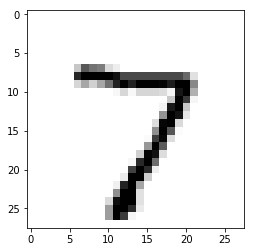

In [34]:
# check a particular observation
observation = data_test[0].split(',')
# print the label
print(observation[0])
# image the number
image = np.asfarray(observation[1:]).reshape((28,28))
mpp.imshow(image, cmap='Blues', interpolation='None')

In [35]:
# Use this observation as an input and run NN with it
input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T
h_input = np.dot(w_i_h, input)
h_output = sigmoid(h_input)
o_input = np.dot(w_h_o, h_output)
o_output = sigmoid(o_input)

o_output

array([[ 0.10333577],
       [ 0.02102201],
       [ 0.00853034],
       [ 0.08203042],
       [ 0.00635177],
       [ 0.02326992],
       [ 0.02360248],
       [ 0.42970462],
       [ 0.08602563],
       [ 0.04961633]])

In [36]:
# Get the prediction of NN for this test observation
label = np.argmax(o_output)
label

7

In [37]:
# test the neural network using all test dataset

# scorecard of the network
scorecard = []

# go through all the observations in the test data set
for i in data_test:
    observation = i.split(',')
    correct_label = int(observation[0])
    input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T

    h_input = np.dot(w_i_h, input)
    h_output = sigmoid(h_input)
    o_input = np.dot(w_h_o, h_output)
    o_output = sigmoid(o_input)

    label = np.argmax(o_output)

    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    
    pass

In [38]:
# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.4806


It is several times better than naive. Can we do better?

## Improvements?

In [39]:
# What if we train it more? What does this mean? Introduce local minimum concept.
epochs = 5

In [44]:
# The "big loop" with epochs
for e in range(epochs):
    for i in data:
        observation = i.split(',')
        input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T
        target = np.array(np.zeros(o_n) + 0.01, ndmin=2).T
        target[int(observation[0])] = 0.99

        h_input = np.dot(w_i_h, input)
        h_output = sigmoid(h_input)
        o_input = np.dot(w_h_o, h_output)
        o_output = sigmoid(o_input)

        o_errors = target - o_output
        h_errors = np.dot(w_h_o.T, o_errors)
        w_h_o += l_r * np.dot((o_errors * o_output * (1.0 - o_output)), np.transpose(h_output))
        w_i_h += l_r * np.dot((h_errors * h_output * (1.0 - h_output)), np.transpose(input))

        pass
    pass


# test
scorecard = []

for i in data_test:
    observation = i.split(',')
    correct_label = int(observation[0])
    input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T

    h_input = np.dot(w_i_h, input)
    h_output = sigmoid(h_input)
    o_input = np.dot(w_h_o, h_output)
    o_output = sigmoid(o_input)

    label = np.argmax(o_output)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    
    pass


# calculate accuracy
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() /
scorecard_array.size)

performance =  0.9592


### Other l_r?

In [41]:
l_r = 0.1
# run the "big loop" with epochs again to get measure accuracy for new settings

### More hidden nodes?

In [42]:
h_n = 150

# Determine the weights for a bigger matrices
w_i_h = np.random.normal(0.0, pow(h_n, -0.5), (h_n, i_n))
w_h_o = np.random.normal(0.0, pow(o_n, -0.5), (o_n, h_n))

# run the "big loop" with epochs again to get measure accuracy for new settings

It is much easier to train neural networks where the number of neurons is larger than required. But, with a smaller number of neurons the neural network has much better generalization abilities. It means it will respond correctly for patterns not used for training. If too many neurons are used, then the network can be overtrained on the training patterns, but it will fail on patterns never used in training. With a smaller number of neurons, the network cannot be trained to very small errors, but it may produce much better approximations for new patterns. The most common mistake made by many researchers is that in order to speed up the training process and to reduce the training errors, they use neural networks with a larger number of neurons than required. Such networks would perform very poorly for new patterns not used for training.

### Other training set?

In [43]:
# Load the data
raw_data = open("data/mnist_train.csv", 'r')
data = raw_data.readlines()
raw_data.close()

# Settings
epochs = 2
l_r = 0.1
h_n = 90
w_i_h = np.random.normal(0.0, pow(h_n, -0.5), (h_n, i_n))
w_h_o = np.random.normal(0.0, pow(o_n, -0.5), (o_n, h_n))

# run the "big loop" with epochs again to get measure accuracy for new settings